In [20]:
from tensorflow.keras.models import Sequential

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Load and preprocess data
data = pd.read_csv('texas.csv')

In [24]:
data

,DATE (MM/DD/YYYY),CST,Global Horizontal [W/m^2],Direct Normal [W/m^2],Diffuse Horizontal [W/m^2],Downwelling IR [W/m^2],Pyrgeometer Net [W/m^2],Global (stdev) [W/m^2],Direct (stdev) [W/m^2],Diffuse (stdev) [W/m^2],IR (stdev) [W/m^2],Net (stdev) [W/m^2]
0,09/10/2024,00:00,-1.01310,-0.381900,-1.77122,437.3,-15.58,0.0,0.0,0.000,0.114,0.114
1,09/10/2024,00:01,-1.01310,-0.381900,-1.77122,437.1,-15.71,0.0,0.0,0.000,0.159,0.159
2,09/10/2024,00:02,-1.01310,-0.381900,-1.77122,437.0,-15.86,0.0,0.0,0.000,0.170,0.170
3,09/10/2024,00:03,-1.01310,-0.381900,-1.77122,437.0,-15.81,0.0,0.0,0.000,0.201,0.201
4,09/10/2024,00:04,-1.01310,-0.381899,-1.77121,437.1,-15.77,0.0,0.0,0.000,0.221,0.221
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,09/10/2024,23:55,-1.68846,-0.381889,-2.27890,404.2,-45.59,0.0,0.0,0.285,0.179,0.143
1436,09/10/2024,23:56,-1.68845,-0.381889,-2.31433,403.9,-45.77,0.0,0.0,0.219,0.243,0.204
1437,09/10/2024,23:57,-1.68845,-0.381889,-2.38517,403.6,-45.84,0.0,0.0,0.203,0.148,0.156
1438,09/10/2024,23:58,-1.68845,-0.381888,-2.29071,403.6,-45.85,0.0,0.0,0.285,0.235,0.227


In [25]:
# Create DataFrame
df = pd.DataFrame(data)

# Convert DATE to datetime format and CST to time format
df['DATE'] = pd.to_datetime(df['DATE (MM/DD/YYYY)'], format='%m/%d/%Y')
df['CST'] = pd.to_datetime(df['CST'], format='%H:%M').dt.time


In [26]:
# Combine DATE and CST into a single datetime column
df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['DATE'], row['CST']), axis=1)


In [27]:
df


,DATE (MM/DD/YYYY),CST,Global Horizontal [W/m^2],Direct Normal [W/m^2],Diffuse Horizontal [W/m^2],Downwelling IR [W/m^2],Pyrgeometer Net [W/m^2],Global (stdev) [W/m^2],Direct (stdev) [W/m^2],Diffuse (stdev) [W/m^2],IR (stdev) [W/m^2],Net (stdev) [W/m^2],DATE,Datetime
0,09/10/2024,00:00:00,-1.01310,-0.381900,-1.77122,437.3,-15.58,0.0,0.0,0.000,0.114,0.114,2024-09-10,2024-09-10 00:00:00
1,09/10/2024,00:01:00,-1.01310,-0.381900,-1.77122,437.1,-15.71,0.0,0.0,0.000,0.159,0.159,2024-09-10,2024-09-10 00:01:00
2,09/10/2024,00:02:00,-1.01310,-0.381900,-1.77122,437.0,-15.86,0.0,0.0,0.000,0.170,0.170,2024-09-10,2024-09-10 00:02:00
3,09/10/2024,00:03:00,-1.01310,-0.381900,-1.77122,437.0,-15.81,0.0,0.0,0.000,0.201,0.201,2024-09-10,2024-09-10 00:03:00
4,09/10/2024,00:04:00,-1.01310,-0.381899,-1.77121,437.1,-15.77,0.0,0.0,0.000,0.221,0.221,2024-09-10,2024-09-10 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,09/10/2024,23:55:00,-1.68846,-0.381889,-2.27890,404.2,-45.59,0.0,0.0,0.285,0.179,0.143,2024-09-10,2024-09-10 23:55:00
1436,09/10/2024,23:56:00,-1.68845,-0.381889,-2.31433,403.9,-45.77,0.0,0.0,0.219,0.243,0.204,2024-09-10,2024-09-10 23:56:00
1437,09/10/2024,23:57:00,-1.68845,-0.381889,-2.38517,403.6,-45.84,0.0,0.0,0.203,0.148,0.156,2024-09-10,2024-09-10 23:57:00
1438,09/10/2024,23:58:00,-1.68845,-0.381888,-2.29071,403.6,-45.85,0.0,0.0,0.285,0.235,0.227,2024-09-10,2024-09-10 23:58:00


In [18]:
df['Datetime']

0      2024-09-10 00:00:00
1      2024-09-10 00:01:00
2      2024-09-10 00:02:00
3      2024-09-10 00:03:00
4      2024-09-10 00:04:00
               ...        
1435   2024-09-10 23:55:00
1436   2024-09-10 23:56:00
1437   2024-09-10 23:57:00
1438   2024-09-10 23:58:00
1439   2024-09-10 23:59:00
Name: Datetime, Length: 1440, dtype: datetime64[ns]

In [32]:
df.set_index('Datetime', inplace=True)

In [33]:
df = df[['Global Horizontal [W/m^2]']].dropna()

In [49]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 100))


In [50]:
scaled_data = scaler.fit_transform(df)

In [51]:
# Create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [52]:
time_step = 30
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [53]:
# Split into training and test sets
train_size = int(len(X) * 0.5)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# Build and train LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])


Epoch 1/100
23/23 [==============================] - 4s 68ms/step - loss: 137.6432 - val_loss: 515.8975
Epoch 2/100
23/23 [==============================] - 1s 36ms/step - loss: 69.0163 - val_loss: 415.8266
Epoch 3/100
23/23 [==============================] - 1s 36ms/step - loss: 51.2835 - val_loss: 370.6921
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 44.8103 - val_loss: 345.7075
Epoch 5/100
23/23 [==============================] - 1s 37ms/step - loss: 38.9236 - val_loss: 317.5025
Epoch 6/100
23/23 [==============================] - 1s 39ms/step - loss: 33.0576 - val_loss: 293.7784
Epoch 7/100
23/23 [==============================] - 1s 41ms/step - loss: 29.3749 - val_loss: 272.4011
Epoch 8/100
23/23 [==============================] - 1s 41ms/step - loss: 25.1875 - val_loss: 253.4805
Epoch 9/100
23/23 [==============================] - 1s 39ms/step - loss: 22.5848 - val_loss: 236.7601
Epoch 10/100
23/23 [==============================] - 1s 38ms/step - los

In [57]:
# Predict and plot results
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


23/23 [==============================] - 0s 10ms/step


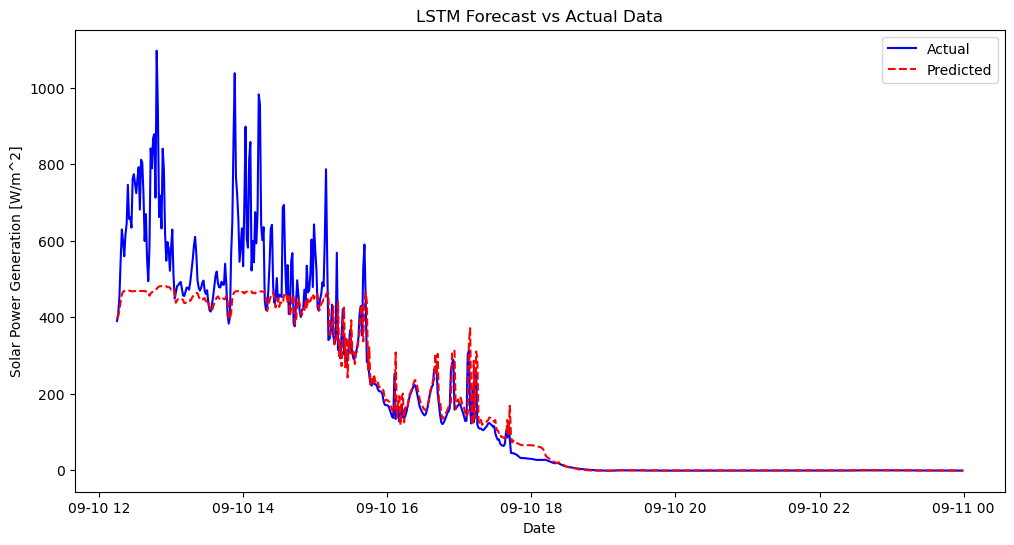

In [58]:
plt.figure(figsize=(12, 6))
#plt.plot(data.index[train_size + time_step:], y_test_rescaled, color='blue', label='Actual')
#plt.plot(data.index[train_size + time_step:], predictions, color='red', linestyle='--', label='Predicted')
plt.plot(df.index[train_size + time_step:], y_test_rescaled, color='blue', label='Actual')
plt.plot(df.index[train_size + time_step:], predictions, color='red', linestyle='--', label='Predicted')
plt.title('LSTM Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation [W/m^2]')
plt.legend()
plt.show()